<a href="https://colab.research.google.com/github/Vishal-257/EDA_DA/blob/main/eda_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np

In [128]:
df = pd.read_csv('/content/happiness.csv')

In [129]:
df.head(n=10)

,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
5,6,1994,working parttime,43.0,NaN,NaN,15.0,middle atlantic,0.0,0.0,...,1.0,0.0,1,0,0,0,0,0,0,NaN
6,7,1994,working fulltime,20.0,no,NaN,9.0,middle atlantic,0.0,1.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
7,8,1994,working fulltime,44.0,NaN,NaN,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,0.0
8,9,1994,working fulltime,42.0,no,NaN,12.0,foreign,2.0,1.0,...,1.0,0.0,1,0,0,0,0,0,0,NaN
9,10,1994,working fulltime,46.0,NaN,iap,12.0,middle atlantic,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,1.0


In [130]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 17137, Columns: 34


In [131]:
print(df.info())
print(df.describe())
categorical_columns = df.select_dtypes(include=['object']).columns
print(df[categorical_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     17137 non-null  int64  
 1   year         17137 non-null  int64  
 2   workstat     17134 non-null  object 
 3   prestige     16283 non-null  float64
 4   divorce      9754 non-null   object 
 5   widowed      11096 non-null  object 
 6   educ         17093 non-null  float64
 7   reg16        17137 non-null  object 
 8   babies       17036 non-null  float64
 9   preteen      17036 non-null  float64
 10  teens        17049 non-null  float64
 11  income       15045 non-null  object 
 12  region       17137 non-null  object 
 13  attend       16864 non-null  object 
 14  happy        17137 non-null  object 
 15  owngun       11297 non-null  object 
 16  tvhours      11794 non-null  float64
 17  vhappy       17137 non-null  int64  
 18  mothfath16   17132 non-null  float64
 19  blac

In [132]:
print(df.isnull().sum())

rownames           0
year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


In [133]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mode())

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-133-c56ea01281b5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [134]:
print(df.isnull().sum())

rownames           0
year               0
workstat           0
prestige         854
divorce            0
widowed            0
educ              44
reg16              0
babies           101
preteen          101
teens             88
income             0
region             0
attend             0
happy              0
owngun             0
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15206
female             0
blackfemale        0
gwbush00       13700
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


In [135]:
print(df.shape)

(17137, 34)


In [136]:
columns = df.columns

In [137]:
print("Mean of:")
for col in columns:
  if(df[col].dtype==int or df[col].dtype==float):
    x = df[col].mean()
    print(col,":",x)

Mean of:
rownames : 8569.0
year : 1999.4741203244441
prestige : 43.87754099367439
educ : 13.319077985140115
babies : 0.2070908664005635
preteen : 0.2557525240666823
teens : 0.18135961053434219
tvhours : 2.9040189927081568
vhappy : 0.3069382038863278
mothfath16 : 0.6929722157366331
black : 0.13841395810235163
gwbush04 : 0.5018125323666494
female : 0.559082686584583
blackfemale : 0.08904709108945556
gwbush00 : 0.5219668315391329
occattend : 0.28498576850094876
regattend : 0.1312262808349146
y94 : 0.17371768687634942
y96 : 0.16834918597187373
y98 : 0.16373927758650872
y00 : 0.16204703273618487
y02 : 0.07988562758942638
y04 : 0.07801832292700006
y06 : 0.1742428663126568
unem10 : 0.3184022572965347


In [138]:
print("Standard deviation of:")
for col in columns:
  if(df[col].dtype==int or df[col].dtype==float):
    x = df[col].std()
    print(col,":",x)

Standard deviation of:
rownames : 4947.170117013025
year : 4.143357578023848
prestige : 13.873965071808128
educ : 2.986784887039283
babies : 0.5405420440627029
preteen : 0.6215334744450766
teens : 0.4936977335865132
tvhours : 2.3274571287454373
vhappy : 0.4612369856486698
mothfath16 : 0.46127447755593226
black : 0.34534402218853383
gwbush04 : 0.5001262307687533
female : 0.49651145163592225
blackfemale : 0.2848200140749841
gwbush00 : 0.4995899087223422
occattend : 0.45142104961848034
regattend : 0.3376576739370208
y94 : 0.3788775905902757
y96 : 0.3741869959534851
y98 : 0.3700496146022133
y00 : 0.36850470287598425
y02 : 0.27112396341556144
y04 : 0.2682082435269197
y06 : 0.37932925848656257
unem10 : 0.46587701983507035


In [139]:
print("Variance of:")
for col in columns:
  if(df[col].dtype==int or df[col].dtype==float):
    x = df[col].var()
    print(col,":",x)

Variance of:
rownames : 24474492.166666668
year : 17.16741201936765
prestige : 192.4869068137519
educ : 8.920883961446263
babies : 0.292185701399485
preteen : 0.3863038598557686
teens : 0.24373745214845974
tvhours : 5.417056686147956
vhappy : 0.21273955693027122
mothfath16 : 0.21277414364449826
black : 0.11926249366135454
gwbush04 : 0.25012624670296024
female : 0.24652362160561078
blackfemale : 0.08112244041767414
gwbush00 : 0.24959007689719823
occattend : 0.2037809640386505
regattend : 0.11401270476855943
y94 : 0.14354822865149255
y96 : 0.14001590794069346
y98 : 0.1369367172672466
y00 : 0.13579571604171745
y02 : 0.0735082035381627
y04 : 0.07193566189579546
y06 : 0.1438906863439654
unem10 : 0.21704139761040653


In [142]:
corr_df = df
columns = df.columns
for col in columns:
  if(df[col].dtype!=int and df[col].dtype!=float):
    corr_df.drop(columns=col, inplace=True)

In [143]:
correlation_matrix = corr_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             rownames      year  prestige      educ    babies   preteen  \
rownames     1.000000  0.980642  0.021869  0.008828 -0.029565 -0.028055   
year         0.980642  1.000000  0.033615  0.027434 -0.026444 -0.029795   
prestige     0.021869  0.033615  1.000000  0.522811 -0.014909 -0.007824   
educ         0.008828  0.027434  0.522811  1.000000 -0.004396 -0.006918   
babies      -0.029565 -0.026444 -0.014909 -0.004396  1.000000  0.180785   
preteen     -0.028055 -0.029795 -0.007824 -0.006918  0.180785  1.000000   
teens       -0.000532  0.000588 -0.017775 -0.021106 -0.035141  0.180785   
tvhours      0.010922  0.009227 -0.199099 -0.244835 -0.018008 -0.051414   
vhappy       0.016312  0.010997  0.095044  0.084643  0.016945  0.008592   
mothfath16  -0.003977 -0.005080  0.106647  0.136651 -0.042799 -0.032696   
black       -0.006054  0.002911 -0.116796 -0.113279  0.041579  0.056435   
gwbush04     0.101187 -0.022680  0.029701 -0.020648  0.038571  0.069064   
femal

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

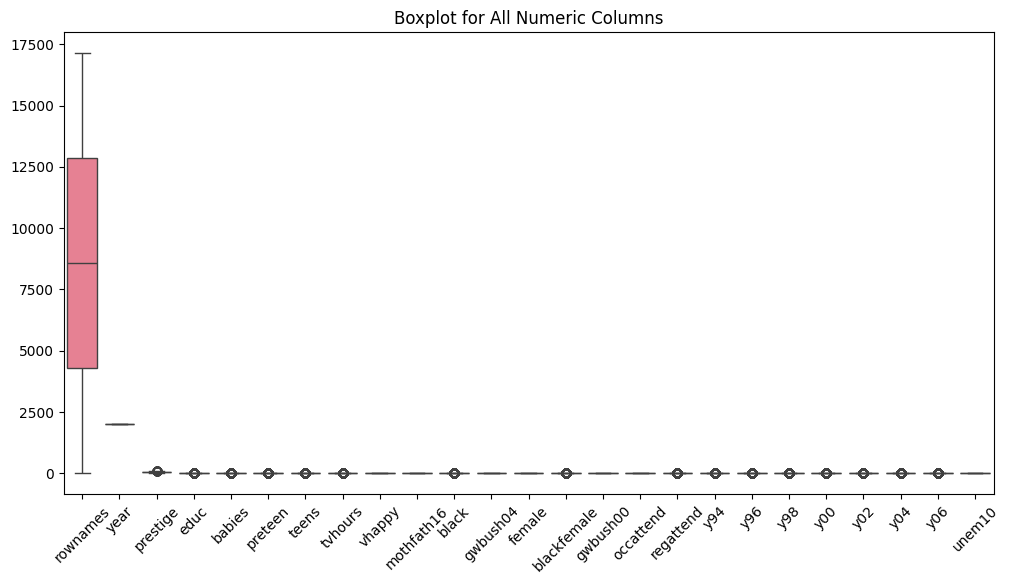

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()

In [154]:
for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

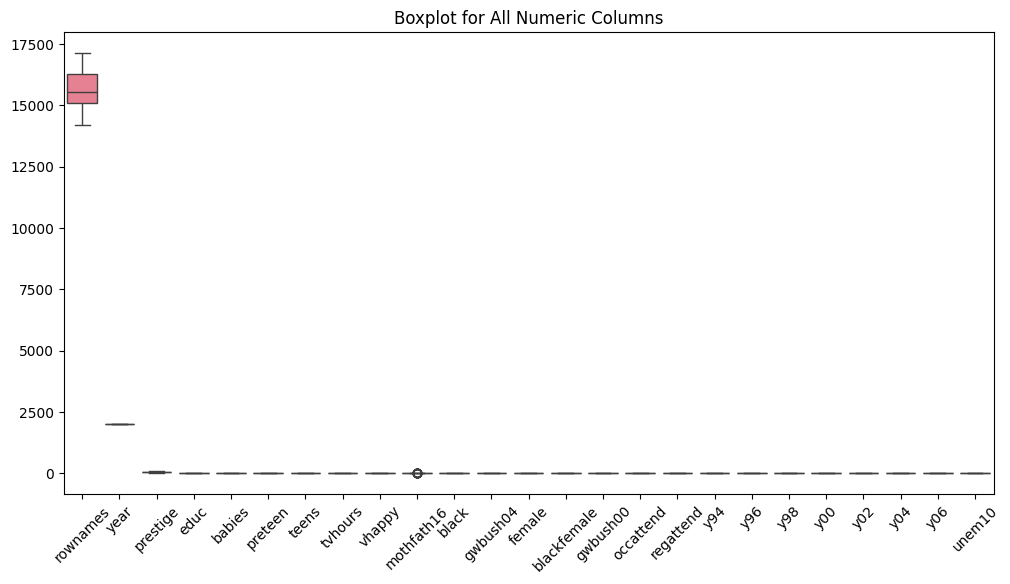

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()